In [1]:
import pandas as pd
import numpy as np 


In [2]:
from google.colab import drive


In [3]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [28]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/koronoios_live.tsv", sep='\t')


df['Text'] = full_text_list

In [5]:
df.head()

,Unnamed: 0,headline,url,date
0,0,\nΣτα 11.629 τα νέα κρούσματα κορωνοϊού - 26 θ...,https://www.protothema.gr/koronoios-live/artic...,2022-07-03T15:37:00+03:00
1,1,\nΙσχυρή σύσταση από την Παγώνη: «Μην ξεχνάτε ...,https://www.protothema.gr/koronoios-live/artic...,2022-07-02T18:41:00+03:00
2,2,"\nΣτα 15.839 τα νέα κρούσματα, 22 θάνατοι, 95 ...",https://www.protothema.gr/koronoios-live/artic...,2022-07-02T15:48:00+03:00
3,3,\nΤο σοβαρό άσθμα δεν δείχνει να επιβαρύνει τη...,https://www.protothema.gr/koronoios-live/artic...,2022-07-02T14:19:00+03:00
4,4,\nΣτην Ιταλία ο ενεργός αριθμός αναπαραγωγής ...,https://www.protothema.gr/koronoios-live/artic...,2022-07-02T05:57:40+03:00


In [6]:
df['date'].replace ('T', '')


0      2022-07-03T15:37:00+03:00
1      2022-07-02T18:41:00+03:00
2      2022-07-02T15:48:00+03:00
3      2022-07-02T14:19:00+03:00
4      2022-07-02T05:57:40+03:00
                 ...            
235    2022-05-04T09:53:00+03:00
236    2022-05-04T08:50:00+03:00
237    2022-05-04T07:58:00+03:00
238    2022-05-03T21:35:00+03:00
239    2022-05-03T18:48:00+03:00
Name: date, Length: 240, dtype: object

In [41]:
import spacy

In [42]:
df.dtypes

Unnamed: 0     int64
headline      object
url           object
date          object
dtype: object

In [46]:
text = df['headline'].str.cat(sep = ' ').replace("amp", ' ')


In [47]:
text

'\nΣτα 11.629 τα νέα κρούσματα κορωνοϊού - 26 θάνατοι και 98 διασωληνωμένοι\n \nΙσχυρή σύσταση από την Παγώνη: «Μην ξεχνάτε τις μάσκες, είχαμε 300 εισαγωγές σε ένα 24ωρο»\n \nΣτα 15.839 τα νέα κρούσματα, 22 θάνατοι, 95 διασωληνωμένοι\n \nΤο σοβαρό άσθμα δεν δείχνει να επιβαρύνει τη λοίμωξη Covid, σύμφωνα με ελληνική έρευνα\n \nΣτην  Ιταλία ο ενεργός αριθμός αναπαραγωγής (Rt) του νέου κορωνοϊού αυξήθηκε για 4η συναπτή εβδομάδα\n \nΗ Βόρεια Κορέα κατηγορεί για το ξέσπασμα της Covid «ξένους» και μπαλόνια από τη Νότια Κορέα \n \nΣτα 15.869 τα νέα κρούσματα, 14 θάνατοι, 95 διασωληνωμένοι\n \nΣτο «κόκκινο» ξανά το ιικό φορτίο των λυμάτων στη Θεσσαλονίκη\n \n«Καμπανάκι» από τέσσερις ειδικούς - Μέσα Ιουλίου η κορύφωση των κρουσμάτων, «πρέπει να πάρουμε μέτρα… χθες»\n \nΔιήμερο υψηλού πυρετού προκαλούν οι υποπαραλλαγές 04 και 05, λέει η Παγώνη\n \n«Καμπανάκι» από τον Παγκόσμιο Οργανισμό Υγείας για την Ευρώπη: Κοντά στα 500.000 τα ημερήσια κρούσματα\n \nΘεοδωρίδου: Το εμβόλιο που θα καλύπτει όλε

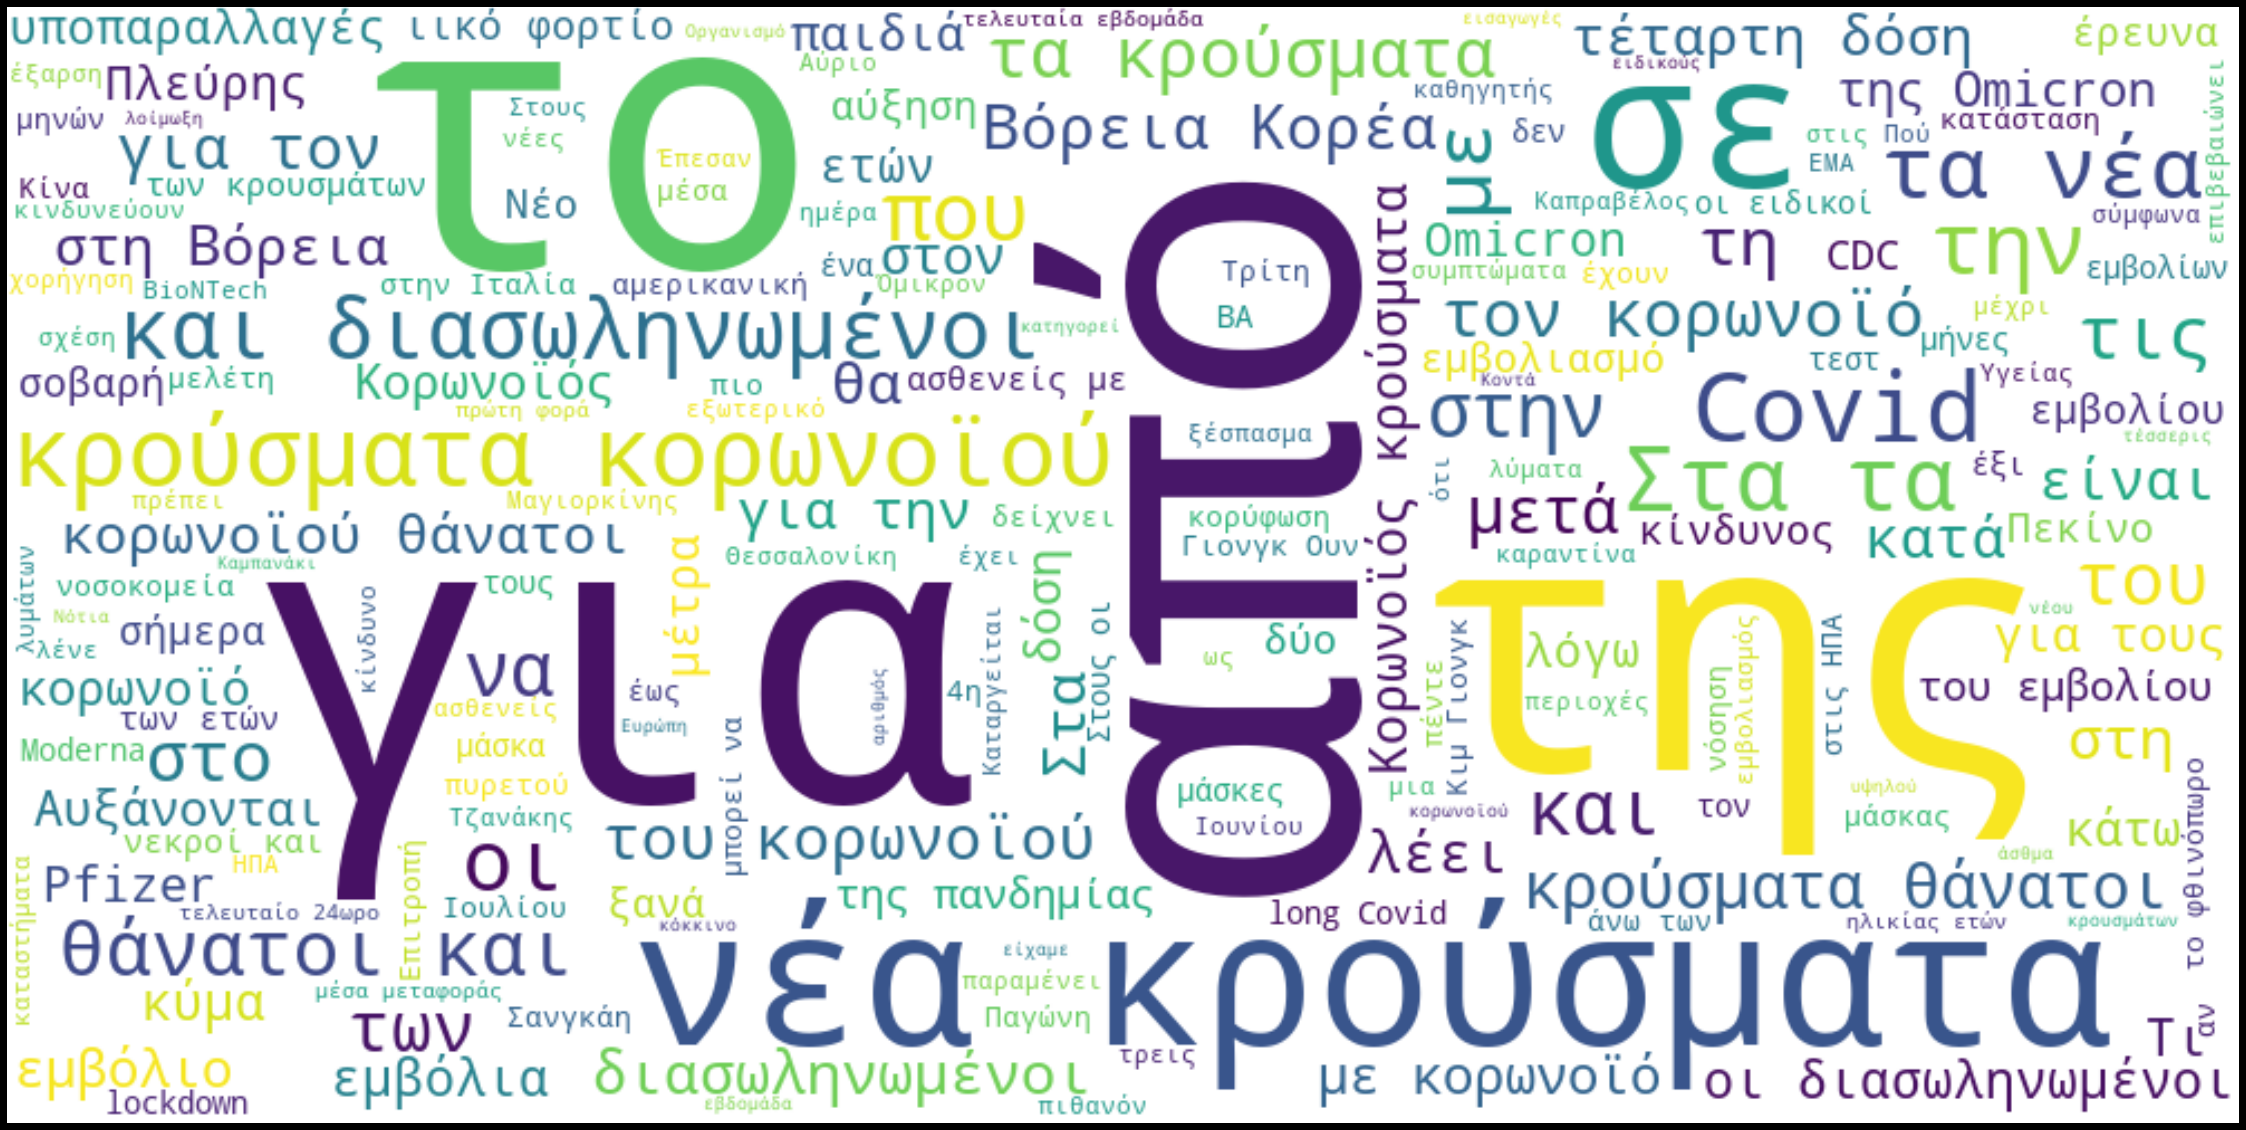

In [55]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 1000,
    height = 500,
    background_color = 'white'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [62]:
from dataclasses import replace
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_vector = cv.fit_transform(df['headline'])
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,026,04,048,05,066,080,082,083,084,...,όπως,όσοι,όσων,ότι,όχι,ύπνου,ύποπτο,ύστερα,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


replace numbers

In [70]:
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,026,04,048,05,066,080,082,083,084,...,όπως,όσοι,όσων,ότι,όχι,ύπνου,ύποπτο,ύστερα,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
common_words=results.sum(axis=0)
common_words.sort_values(ascending=False).head(30)

για               87
και               72
κρούσματα         68
τα                67
κορωνοϊού         61
από               59
της               55
το                52
διασωληνωμένοι    47
οι                44
θάνατοι           43
στα               42
νέα               42
με                40
του               40
την               37
covid             37
τον               35
κορωνοϊό          34
σε                34
των               33
που               24
στην              24
στη               24
να                24
δόση              19
19                19
τις               19
στο               18
κορωνοϊός         17
dtype: int64

In [77]:
df['headline'].loc[0]

'\nΣτα 11.629 τα νέα κρούσματα κορωνοϊού - 26 θάνατοι και 98 διασωληνωμένοι\n'

In [84]:
df['headline'].loc[230]

'\nΠΟΥ: Δύο νέες υποπαραλλαγές της Όμικρον πίσω από την έκρηξη κρουσμάτων στη Νότια Αφρική\n'

In [89]:
df['headline'].loc[238]

'\nΈρευνα του Cambridge: Ο κορωνοϊός γερνά τον εγκέφαλο όσων νόσησαν βαριά μέχρι και 20 χρόνια\n'

In [90]:
df['url'].loc[0]

'https://www.protothema.gr/koronoios-live/article/1260920/koronoios-sta-11629-ta-nea-krousmata-26-thanatoi-kai-98-diasolinomenoi/'

#phra 238


In [91]:
df['url'].loc[238]

'https://www.protothema.gr/koronoios-live/article/1239248/ereuna-tou-cambridge-o-koronoios-gerna-ton-egefalo-oson-nosisan-varia-mehri-kai-20-hronia/'

In [94]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


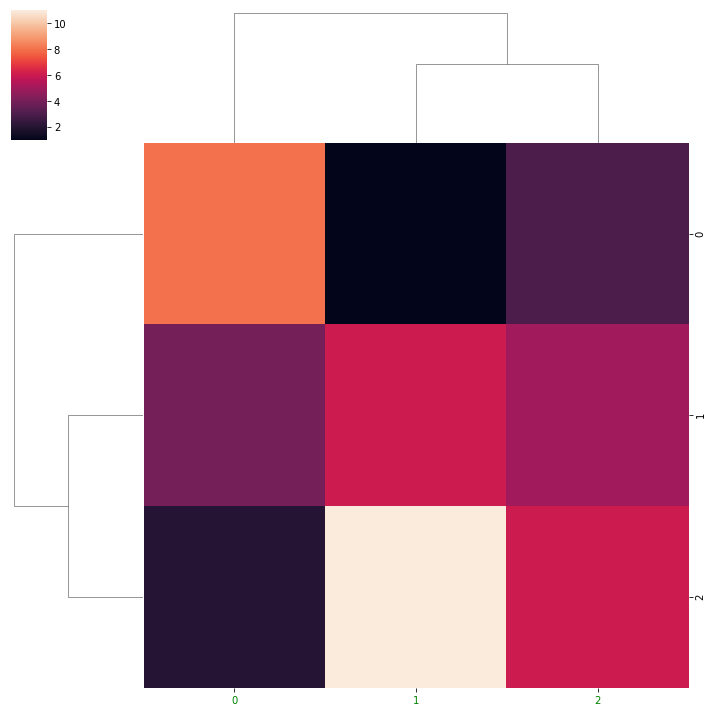

In [100]:
import seaborn as sns
matrix = [[8,1,3],[4,6,5],[2,11,6]]
ax = sns.clustermap(matrix)
for l in ax.ax_heatmap.axes.get_xticklabels():
    l.set_text('c')
    l.set_color('g') 